In [1]:
from PIL import Image
import os
from torchvision import transforms

In [55]:
main_path = "/mnt/e/ml_projects/IN3310/2025/exercise_data/week4_files/"
images_dir = main_path + "imagenet2500/imagespart"

In [56]:
def resize_and_crop(img, s=224, crop=True):
        width, height = img.size
        
        # Rescale smallest side to s
        if width > height:
            img = img.resize((int(s*(width/height)), int(s)))
        else:
            img = img.resize((int(s), int(s*(height/width))))

        if crop:
        # Center-cropping to (s x s)
            left = (img.size[0] - s) // 2
            top = (img.size[1] - s) // 2

            coords = (left, top, left+s, top+s)
            img = img.crop(coords)
    
        return img

In [63]:
for file in os.listdir(images_dir):
    if file.endswith(".JPEG"):
        file_name = os.path.join(images_dir, file)
        img = Image.open(file_name).convert("RGB")
        break

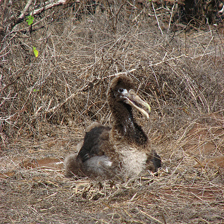

In [65]:
img = resize_and_crop(img, s=224, crop=True)
img


In [61]:
img.size

(224, 224)

In [2]:
normalize_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    #  use the appropriate transforms in addition to normalization
    #  use these statistics for normalization:
    #  mean: [0.485, 0.456, 0.406], std_dev: [0.229, 0.224, 0.225]
])